# CHURN PROPENSITY MODEL FOR A TELCO



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_excel('telus.xlsx', sheet_name='Dataset')

## 1) Pre-Analysis

### PART A) Descriptive Statistics

In [2]:

#Customer ID not helpful for our model 
df.drop(['Cust_id'], axis=1, inplace=True)

categorical = ['LocID', 'GenID', 'RaceID', 'PkgID', 'BillCycle_ID', 'churnid']
numerical = ['Age',
       'Mean_Mthly_Paid', 'Total_Bills', 'Num_of_payments',
       'Timely_full_payments', 'Delayed_Partial_Payments',
       'Total_Paid_last6mth', 'Mean_Mthly_Paid_last6mth',
       'Total_Bills_last6mth', 'Num_Payments_last6mth',
       'Timely_Full_Payments_last6mth', 'Delayed_Partial_Payments_last6mth',
       'ttl_Data', 'ttl_int_SMS', 'ttl_int_Min', 'avg_Data', 'avg_int_SMS',
       'avg_int_Min', 'ttl_Data_last6mth', 'ttl_int_SMS_last6mth',
       'ttl_int_Min_last6mth', 'avg_Data_last6mth', 'avg_int_SMS_last6mth',
       'avg_int_Min_last6mth', 'avg_online_days']

#Describe Categorical Columns
cat_df=df[categorical].astype(str)
cat_df['CusCare_flag']=df['CusCare_flag']
cat_df.describe()

,LocID,GenID,RaceID,PkgID,BillCycle_ID,churnid,CusCare_flag
count,86682,86682,86682,86682,86682,86682,86682
unique,17,2,4,197,10,2,1
top,231,1,1,227,7,0,No
freq,13883,45790,46237,23458,11944,80711,86682


In [3]:
# Describe Numerical Columns : 1
num_df= df[df.columns.difference(categorical)]
num_df.iloc[:,:7].describe()

,Age,Delayed_Partial_Payments,Delayed_Partial_Payments_last6mth,Mean_Mthly_Paid,Mean_Mthly_Paid_last6mth,Num_Payments_last6mth
count,85748.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,35.932873,6.519300,2.019497,93.409494,87.891895,6.102490
std,11.962735,9.236932,3.758705,34.572663,37.381921,3.338844
min,2.000000,-6.000000,-5.000000,1.610000,0.000000,0.000000
25%,26.000000,2.000000,0.000000,72.610000,67.750000,5.000000
50%,34.000000,4.000000,1.000000,88.410000,83.500000,6.000000
75%,44.000000,7.000000,2.000000,106.400000,99.330000,6.000000
max,96.000000,666.000000,156.000000,1458.670000,2007.580000,156.000000


In [4]:
# Describe Numerical Columns : 2
num_df.iloc[:,7:14].describe()

,Num_calls_Cuscare,Num_of_payments,Timely_Full_Payments_last6mth,Timely_full_payments,Total_Bills,Total_Bills_last6mth,Total_Paid_last6mth
count,86682.0,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,0.0,17.355795,4.082993,10.836494,17.355795,6.102490,509.389598
std,0.0,12.055177,1.838732,7.693430,12.055177,3.338844,214.298926
min,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.0,9.000000,3.000000,5.000000,9.000000,5.000000,402.600000
50%,0.0,15.000000,4.000000,9.000000,15.000000,6.000000,485.000000
75%,0.0,23.000000,6.000000,15.000000,23.000000,6.000000,573.150000
max,0.0,671.000000,107.000000,134.000000,671.000000,156.000000,12045.500000


In [5]:
# Describe Numerical Columns : 3
num_df.iloc[:,14:].describe()

,avg_Data,avg_Data_last6mth,avg_int_Min,avg_int_Min_last6mth,avg_int_SMS,avg_int_SMS_last6mth,avg_online_days,ttl_Data,ttl_Data_last6mth,ttl_int_Min,ttl_int_Min_last6mth,ttl_int_SMS,ttl_int_SMS_last6mth
count,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,8.668200e+04,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000
mean,12620.239000,12026.936463,0.084840,0.051516,0.004271,0.002810,12.457615,1.646877e+05,5.472992e+05,1.613422,0.297710,0.088081,0.016532
std,13239.628756,13099.267643,2.881531,2.377736,0.288249,0.350798,1.046374,1.877784e+05,1.173016e+06,49.844719,13.817447,4.937379,2.103239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000009,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4341.252500,3960.160000,0.000000,0.000000,0.000000,0.000000,11.671893,5.099857e+04,2.192293e+04,0.000000,0.000000,0.000000,0.000000
50%,7475.710000,7126.525000,0.000000,0.000000,0.000000,0.000000,12.347601,1.044189e+05,4.196787e+04,0.000000,0.000000,0.000000,0.000000
75%,16162.317500,15450.205000,0.000000,0.000000,0.000000,0.000000,13.013690,2.025944e+05,3.534076e+05,0.000000,0.000000,0.000000,0.000000
max,158910.110000,325562.780000,389.280000,379.250000,73.150000,96.170000,16.499759,3.540219e+06,1.712881e+07,5839.220000,2275.500000,951.000000,577.000000


In [6]:
#check count of churnid
df['churnid'].value_counts()

0    80711
1     5971
Name: churnid, dtype: int64

In [7]:
# After analysis from descriptive stats
     # All values ='No' -> CusCare_flag col
     # Mean && Std = 0 -> Num_calls_Cuscare col
        
df.drop(['CusCare_flag', 'Num_calls_Cuscare'], axis=1, inplace=True)


### PART B) VISUAL EXPLORATION


### i) Correlation Heatmaps

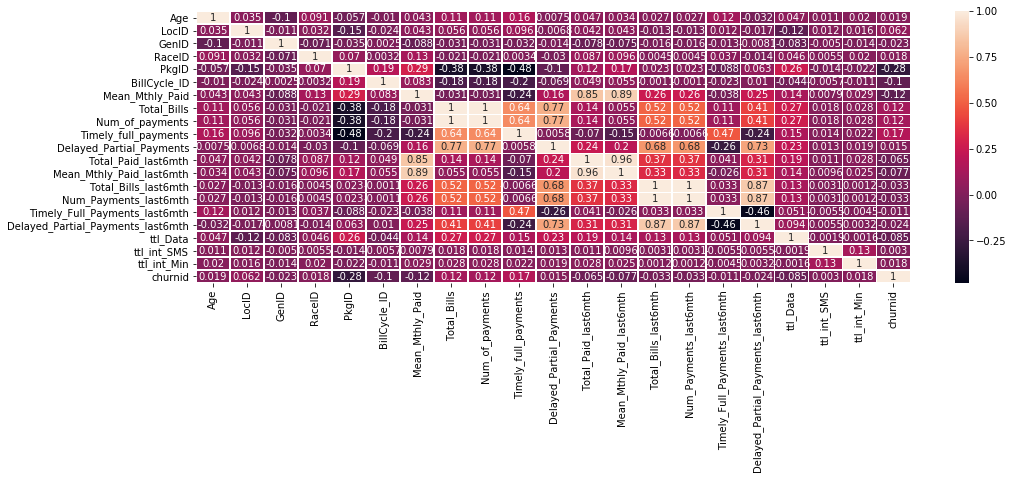

In [11]:

churn_id=df['churnid']
plt.figure(figsize = (16,5))
sns.heatmap(df.iloc[:,:20].join(churn_id).corr(), annot = True, linewidths=.5)


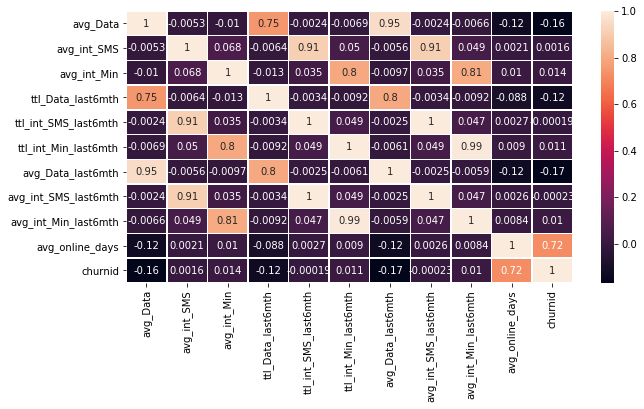

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(df.iloc[:,20:30].join(churn_id).corr(), annot = True, linewidths=.5)

### ii) Pairwise Grids



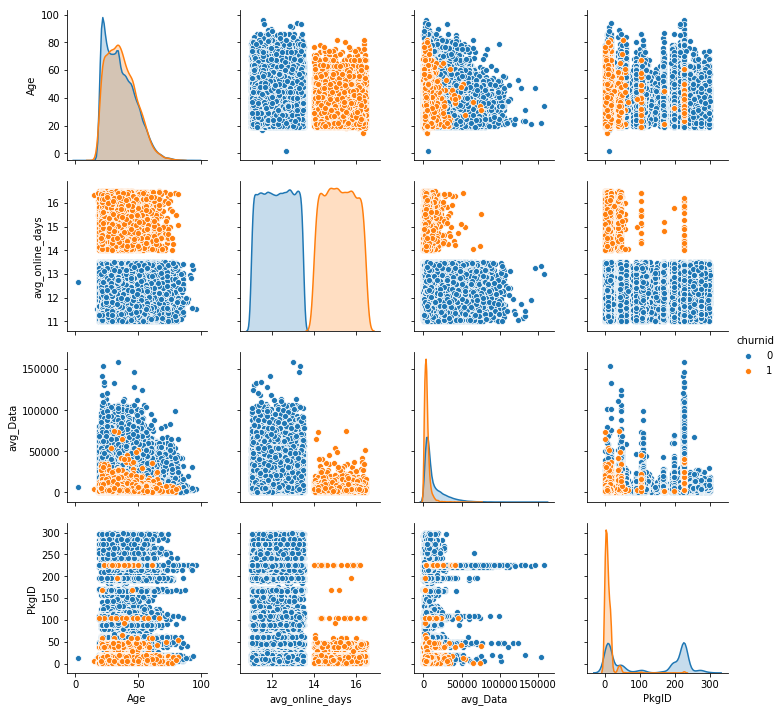

In [13]:
sns.pairplot(df, vars=["Age", "avg_online_days",'avg_Data','PkgID'], hue="churnid", height=2.5)


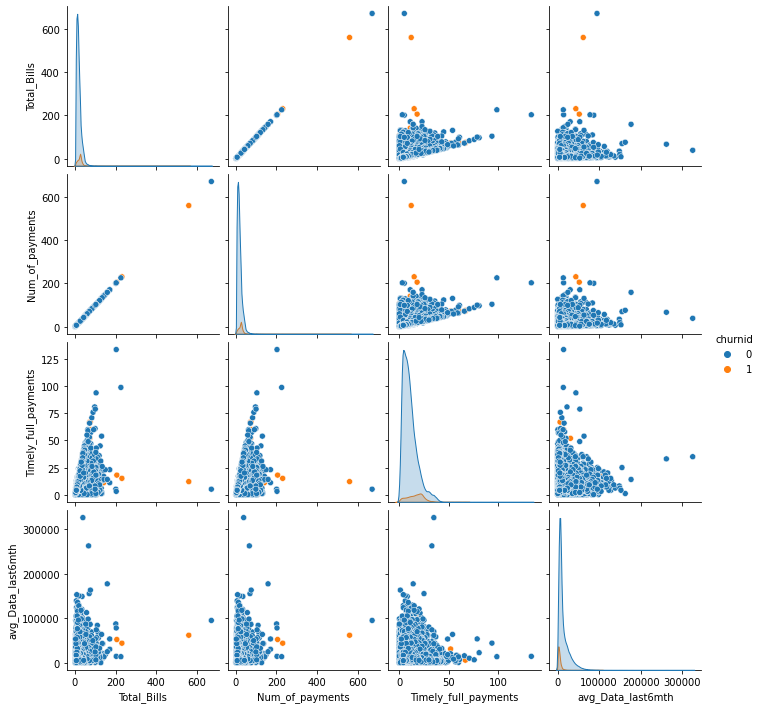

In [14]:
sns.pairplot(df, vars = ["Total_Bills", 'Num_of_payments', 'Timely_full_payments', 'avg_Data_last6mth'], hue="churnid", height=2.5)

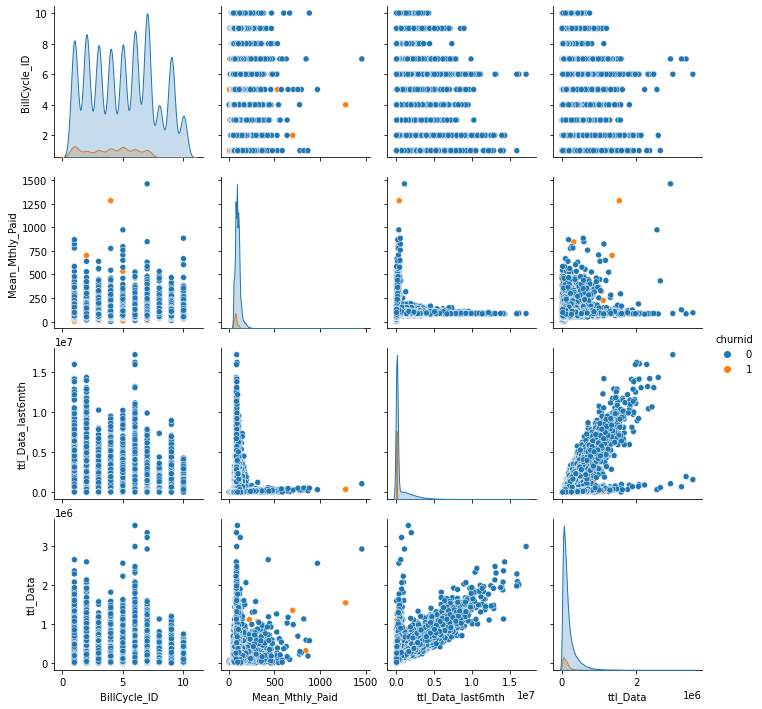

In [15]:
sns.pairplot(df, vars = ["BillCycle_ID", 'Mean_Mthly_Paid', 'ttl_Data_last6mth', 'ttl_Data'], hue="churnid", height=2.5)

### iii) Univariate plot of features

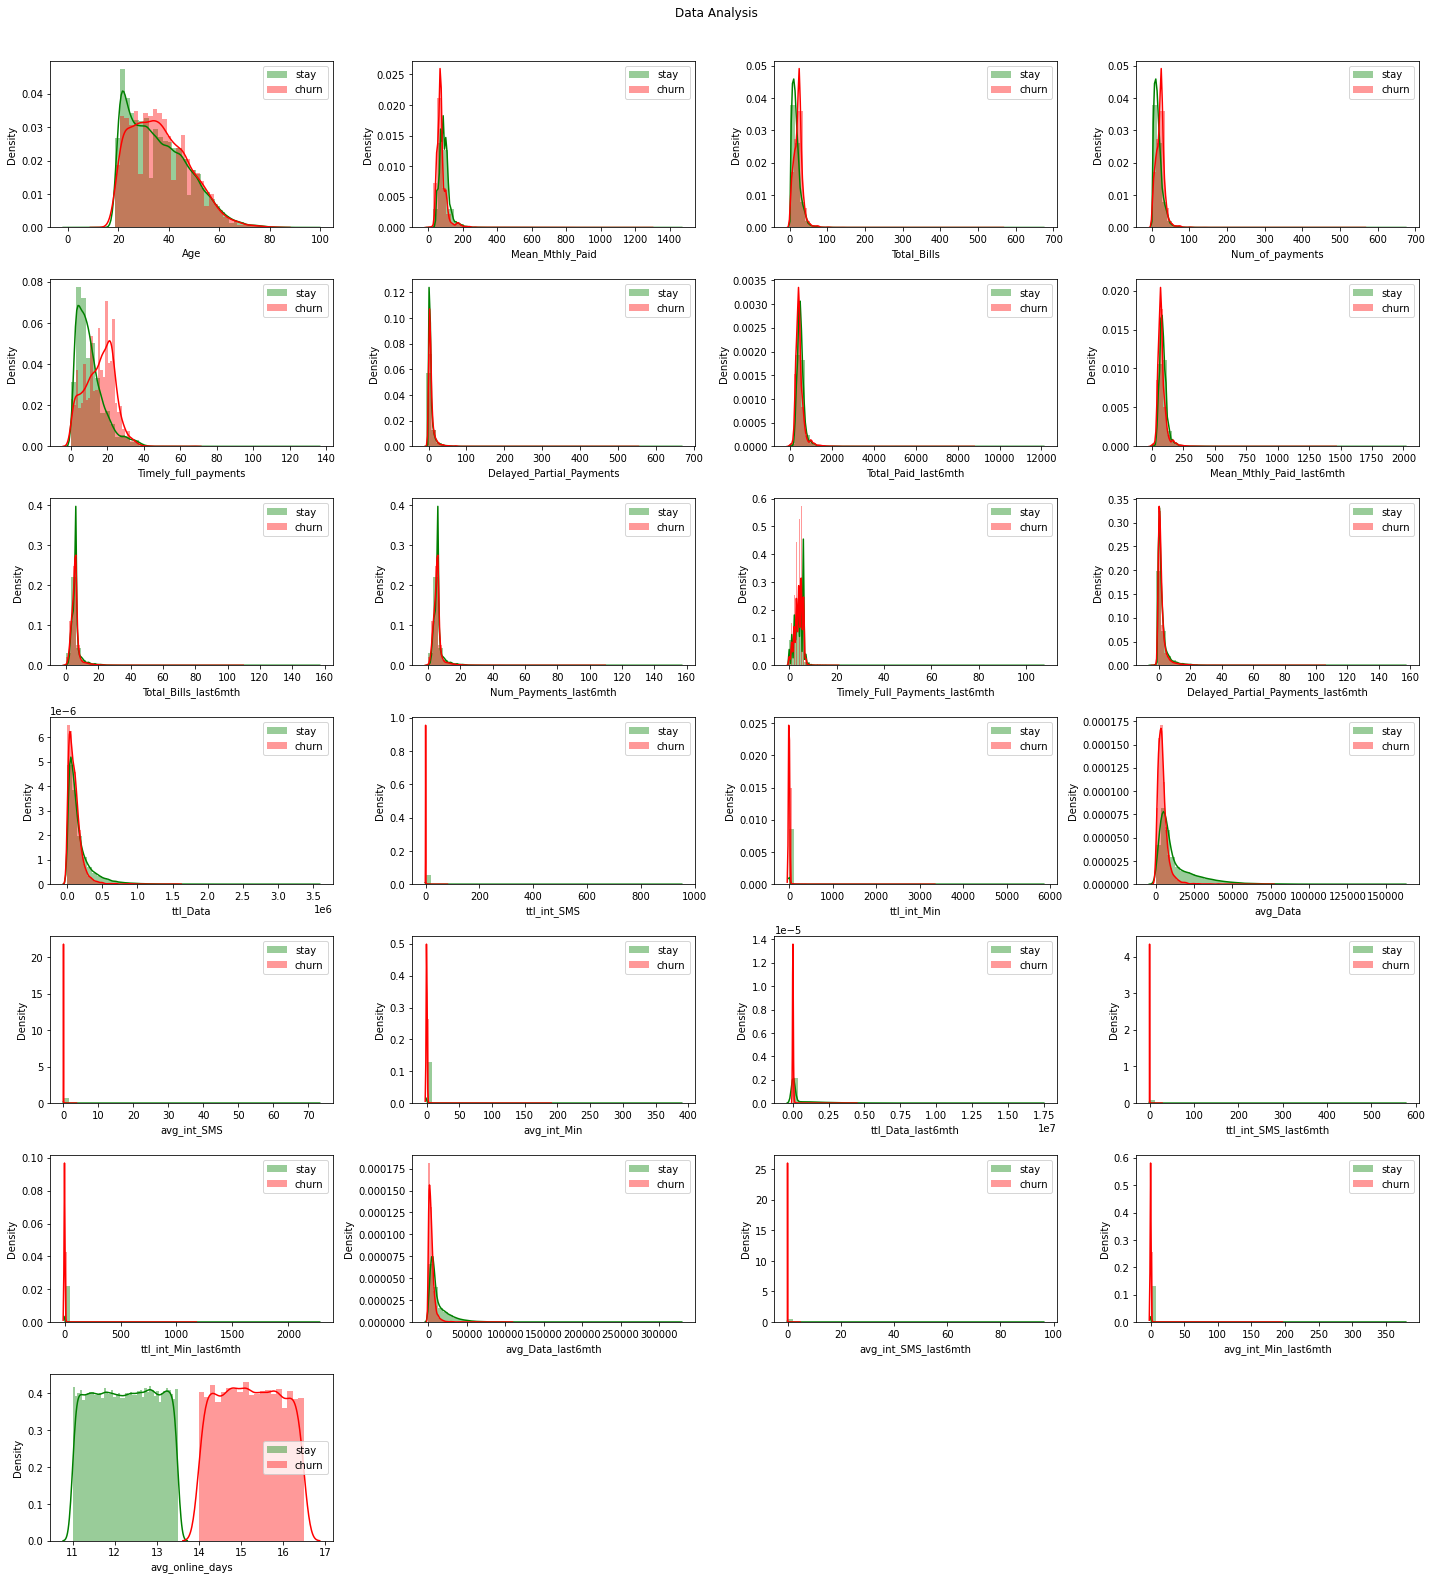

In [16]:
import warnings
#distplot is deprecated, just removed its warning
warnings.simplefilter(action='ignore', category=FutureWarning)


fig = plt.figure(figsize = (20, 25))
j = 0
for i in df[numerical].columns:
    plt.subplot(8, 4, j+1)
    j += 1
    sns.distplot(df[i][df['churnid']==0], color='g', label = 'stay')
    sns.distplot(df[i][df['churnid']==1], color='r', label = 'churn')
    plt.legend(loc='best')
fig.suptitle('Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### iv) Histogram


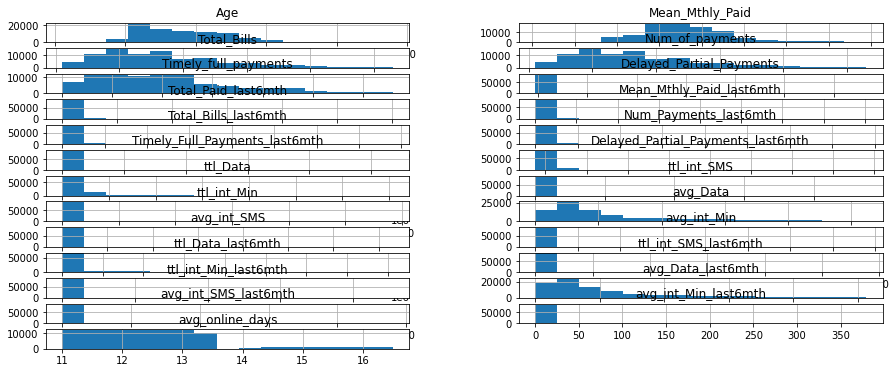

In [89]:
#To help us understand distribution of values for individual variables
df[numerical].hist(bins=15, figsize=(15, 6), layout=(13, 2))
plt.show()

### Findings from descriptive stats and visual analysis


##### 1)Most variables have correlation less than 0.1 with churnid variable as analysed from the correlation heatmaps. 
##### 2) Pairwise grids and univariate plot reveals that 'avg_online_days' is a really strong feature. 
##### 2) After analysis from descriptive stats [CusCare_flag] col all values were 'No'.
##### 3) Num_calls_Cuscare col had mean and std of value 0. 
##### 4)The dataset is imbalanced (80711, and 5971 examples) respectively for the two classes of churnid 0 and 1.
##### 5)Customer Id [Cust_ID] is a non informative column for our dataset and subsequent model.

#### The significance of these findings is to support our data preprocessing and fitting our machine learning model to the right subset of data. 


## 2) Data Preprocessing

In [8]:
#find missing values
df.isnull().sum()

Age                                  934
LocID                                  0
GenID                                  0
RaceID                                 0
PkgID                                  0
BillCycle_ID                           0
Mean_Mthly_Paid                        0
Total_Bills                            0
Num_of_payments                        0
Timely_full_payments                   0
Delayed_Partial_Payments               0
Total_Paid_last6mth                    0
Mean_Mthly_Paid_last6mth               0
Total_Bills_last6mth                   0
Num_Payments_last6mth                  0
Timely_Full_Payments_last6mth          0
Delayed_Partial_Payments_last6mth      0
ttl_Data                               0
ttl_int_SMS                            0
ttl_int_Min                            0
avg_Data                               0
avg_int_SMS                            0
avg_int_Min                            0
ttl_Data_last6mth                      0
ttl_int_SMS_last

In [9]:
#Fix missing values
median_age=df.Age.median()
df=df.fillna({"Age": median_age})

In [37]:
#Based on descriptive stats, some cols have outliers
#Fixing Outliers using Z-Score method
i=[ 'BillCycle_ID','PkgID','Mean_Mthly_Paid','Total_Bills','Num_of_payments','Timely_full_payments','avg_Data','ttl_Data_last6mth','avg_Data_last6mth']
for col in i:
    count=0
    mean=df[col].mean()
    std=df[col].std()
    for i in df[col]:
        z=(i-mean)/std
        # 99% of data lies within z-score of 3, if not we replace it by mean 
        if z>3.0:
            df.loc[df[col]==i,col]=mean
            count+=1
print('Count of outliers fixed:', count)


Count of outliers fixed: 1751


## 3) Machine Learning Model : Decision Tree


In [87]:
from sklearn import preprocessing
from typing import Dict
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#from sklearn.metrics import balanced_accuracy_score
#from sklearn.linear_model import LogisticRegressionCV

def decision_tree(X: pd.DataFrame, y: pd.Series) -> Dict:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)    
    model = DecisionTreeClassifier(random_state=0)
        
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_test) 

    # Since its a binary classification problem, we calculate area under the curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #confusion matrix
    conf_matrix=confusion_matrix(y_test, y_predict)
    
    print(classification_report(y_test, y_predict, target_names=['class 0','class 1']))
          
    return dict(model=model, accuracy=roc_auc, test_prediction=y_predict, confusion_matrix=conf_matrix)

##### Moving forward we only test our model based on variables that have a correlation with a threshold of -0.1 or +0.1

In [88]:
X,y=df.loc[:,['BillCycle_ID','PkgID','Mean_Mthly_Paid','Total_Bills','Num_of_payments','Timely_full_payments','avg_Data','ttl_Data_last6mth','avg_Data_last6mth']],df.loc[:,'churnid']
print(decision_tree(X,y))


              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96     32269
     class 1       0.47      0.48      0.47      2404

    accuracy                           0.93     34673
   macro avg       0.71      0.72      0.72     34673
weighted avg       0.93      0.93      0.93     34673

{'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), 'accuracy': 0.7205415269797583, 'test_prediction': array([0, 0, 0, ..., 0, 0, 0]), 'confusion_matrix': array([[30945,  1324],
       [ 1245,  1159]])}


#### Findings

#### 1) The model runs at an accuracy of 70-74%.
#### 2) The feature 'avg_online_days' column is highly correlated to the target feature. 
#### 3) It is an imbalanced classification problem where one category represents an overwhelming majority of the data points.
#### 4) Classification report reveals that the precision and recall of churnid value '0' is between 94% to 96%. 
#### 5) Classification report reveals that the precision and recall of churnid value '1' is between 46% to 48%


### Steps for Optimization

#### 1) Optimizing this model would require using some cross validation algorithms like RandomsearchCV or GridSearchCV. Many different parameters can be passed at once to hypertune our model with this technique. These algorithms select the best one and return the result with highest accuracy. For example we could pass in many different parameters for min_sample_leaf, min_samples_split and max_depth all at the same time. 

#### 2) The other possible way of optimizing the results would be adjusting the class_weight parameter of the decisiontreeclassifier algorithm. This will solve the imbalance in the dataset. 

### Expected outcome

#### The precision and recall of the class label '1' can be optimized further by 10 to 15%, to bring the model's accuracy for area under curve, to nearly 80%. 